# 스팸 문자 분류
### 영어로 된 문자 메시지 중, 스팸/정상 메시지 구분

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline

In [2]:
!curl -L https://bit.ly/2WC9nvn -o sms_spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   141  100   141    0     0    118      0  0:00:01  0:00:01 --:--:--   118

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
 84  488k   84  414k    0     0   124k      0  0:00:03  0:00:03 --:--:--  435k
100  488k  100  488k    0     0   146k      0  0:00:03  0:00:03 --:--:--  512k


### 문자 메시지 읽기

In [4]:
sms = pd.read_csv('sms_spam.csv', encoding='latin-1')

In [5]:
print(sms.shape)

(5574, 2)


In [6]:
sms.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- #### X : 메시지
- #### y : 스팸(spam)/정상(ham)

In [7]:
x = sms['text'].tolist()
y = sms['type'].tolist()

In [8]:
x[:4], y[:4]

(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  'Ok lar... Joking wif u oni...',
  "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
  'U dun say so early hor... U c already then say...'],
 ['ham', 'ham', 'spam', 'ham'])

### 훈련 데이터 / 시험 데이터 구성

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### 훈련 : MultinomialNB 모델
- #### 훈련 데이터 : 문서-단어 행렬(tf-idf)

#### TfidfVectorizer("english")
-  ‘english’: 영어용 stop_words 사용

In [10]:
tfidf = TfidfVectorizer("english")
x_train_tf = tfidf.fit_transform(x_train)
x_test_tf = tfidf.transform(x_test)

mnb = MultinomialNB()
mnb.fit(x_train_tf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### 모델 적용 : 예측

In [12]:
from sklearn import metrics

y_pred = mnb.predict(x_test_tf) # 학습된 모델을 이용하여 예측

print(metrics.classification_report(y_test, y_pred)) # 분류 성능 평가

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1450
        spam       1.00      0.71      0.83       223

   micro avg       0.96      0.96      0.96      1673
   macro avg       0.98      0.85      0.90      1673
weighted avg       0.96      0.96      0.96      1673



### 분류 정확도 (accuracy) 

In [14]:
print ("score :", mnb.score(x_test_tf, y_test))

score : 0.9611476389719068


# 다른 알고리즘 비교
- https://www.kaggle.com/muzzzdy/sms-spam-detection-with-various-classifiers
- 위 사이트의 소개 예

In [15]:
import seaborn as sns
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

#### str.maketrans(from, to)
- 문자열을 치환해주는 함수
- from, to 문자열의 크기가 동일해야 한다
- translate() 메서드에 전달할 인수를 만드는데 사용된다

#### string.punctuation

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### text = text.translate(str.maketrans('', '', string.punctuation))
- text에 있는 모든 구두점들을 모두 제거
- in:
    - "Hello! It is time to remove punctuations. It is easy, you will see."
- out:
    - "Hello It is time to remove punctuations It is easy you will see"

#### split()
- a = "Life is too short"
- a.split()
- ['Life', 'is', 'too', 'short']
- 괄호 안에 아무 값도 넣어 주지 않으면 공백(스페이스, 탭, 엔터 등)을 기준으로 문자열을 나누어 준다. 

In [17]:
'1,2,3,4'.split(',', maxsplit=2)   # (maxsplit + 1) 개로 나눈다

['1', '2', '3,4']

In [18]:
'1,2,3,4'.split(',')

['1', '2', '3', '4']

#### ",".join('abcd')
- 'a,b,c,d'
- #### 문자열 abcd의 각각의 문자들 사이에 "," 삽입

In [19]:
def text_process(text):
    #구분자 제거
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    #모든 텍스트를 소문자로 바꾸고, stopword를 제거함
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [21]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [22]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [23]:
# train데이터를 각각의 classifier에 fit하기 위한 함수
def train_classifier(clf, X_train, y_train): 
    clf.fit(X_train, y_train)

# feature를 각각의 classifier를 이용해 예측
def predict_labels(clf, features):
    return (clf.predict(features))

# pred_scores 리스트를 만들고, 분류기의 예측 결과들을 리스트의 원소로 함
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, x_train_tf, y_train) # train데이터를 이용해 분류
    pred = predict_labels(v,x_test_tf) # 예측
    pred_scores.append((k, [accuracy_score(y_test,pred)]))# accuracy 스코어를 리스트에 추가

#### from_items(items, columns=None, orient='columns')
- Construct a DataFrame from a list of tuples.

In [24]:
#각각의 classifier 스코어 출력
df = pd.DataFrame.from_items(pred_scores, orient='index', columns=['Score'])
df

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,Score
SVC,0.986252
KN,0.956366
NB,0.985655
DT,0.958757
LR,0.963539
RF,0.979079
AdaBoost,0.971907
BgC,0.966527
ETC,0.983264


- bbox_to_anchor : the bbox that the legend will be anchored 
- borderaxespad	: the pad between the axes and legend border

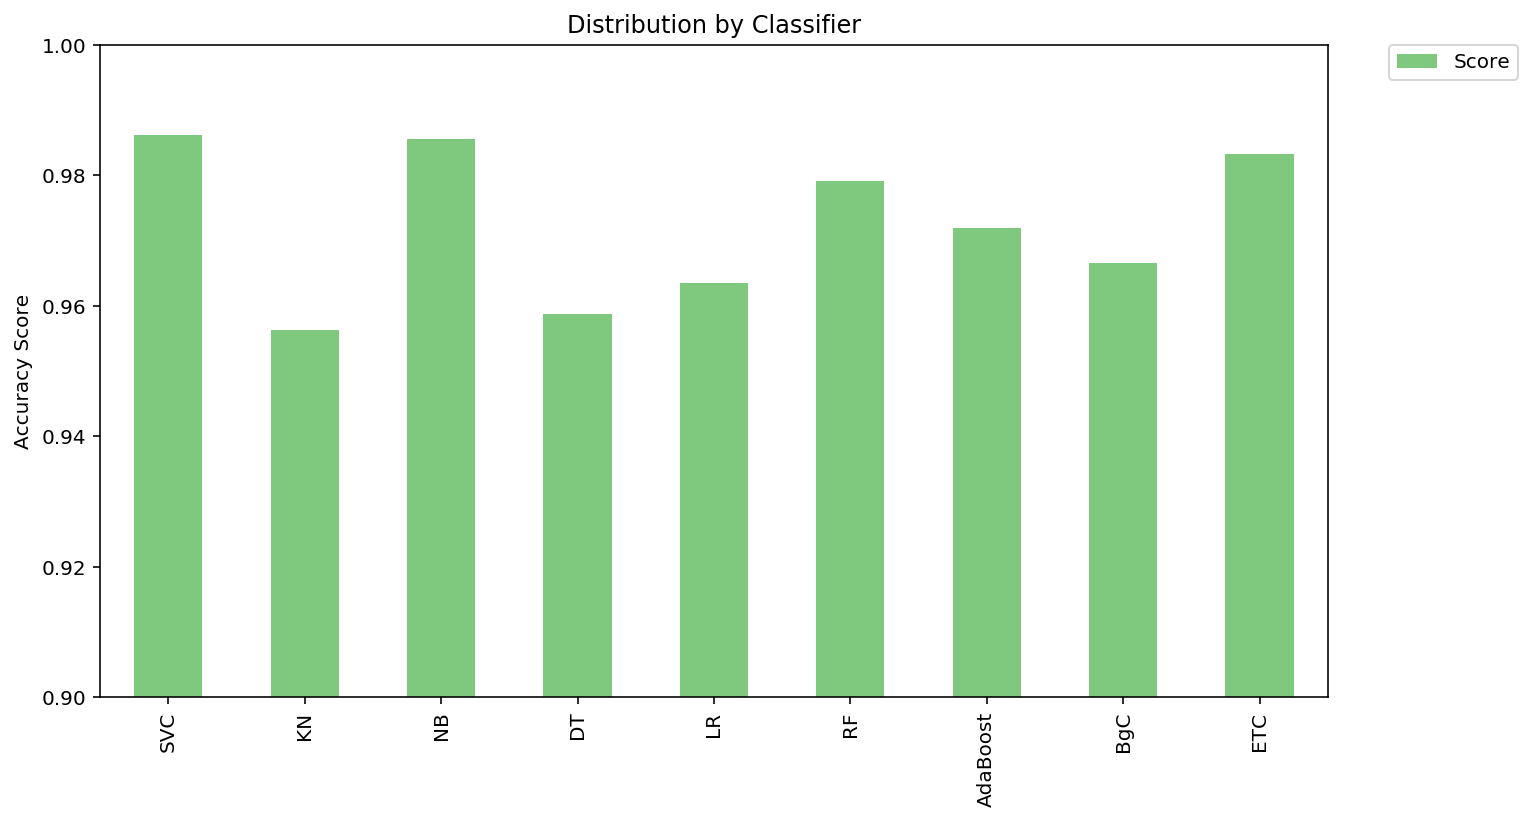

In [25]:
#classifier에 따른 accuracy 히스토그램
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
%config InlineBackend.figure_format = 'retina'